In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import cross_val_score
import GPy

iris = load_iris()
df = pd.DataFrame(columns=["log alpha", "score"])

input_x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
input_y = iris['target']

train_x, test_x, train_y, test_y = train_test_split(input_x, input_y, test_size=0.2, random_state=0)

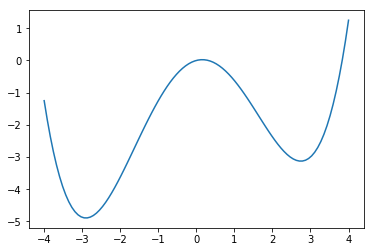

In [104]:
def functionX(x):
    return 1/16*x**4-x**2+5/16*x#np.sin(x*np.pi)+0.5*x**2
x = np.linspace(-4, 4, 100)
plt.plot(x,functionX(x))

In [110]:
np.random.seed(1)
sample_x = np.random.rand(5)*8-4
sample_y = functionX(sample_x)

In [111]:
gpr = GaussianProcessRegressor(kernel=RBF(), n_restarts_optimizer=10)

In [112]:
%%time
gpr.fit(sample_x.reshape(-1,1), sample_y)

Wall time: 28 ms


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=RBF(length_scale=1), n_restarts_optimizer=10,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

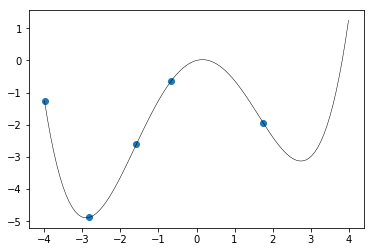

In [113]:
plt.scatter(sample_x, sample_y)
mean, std = gpr.predict(x.reshape(-1,1), return_std=True)
plt.plot(x, functionX(x), color="black", linewidth=0.5)
#plt.plot(x, mean, color="C0")
#plt.fill_between(x, mean-std, mean+std, alpha=0.3, color="C0")

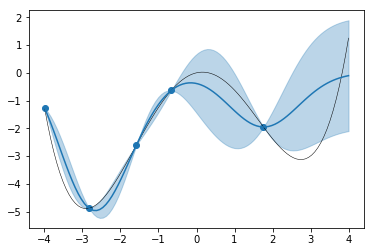

In [114]:
plt.scatter(sample_x, sample_y)
mean, std = gpr.predict(x.reshape(-1,1), return_std=True)
plt.plot(x, functionX(x), color="black", linewidth=0.5)
plt.plot(x, mean, color="C0")
plt.fill_between(x, mean-std*2, mean+std*2, alpha=0.3, color="C0")

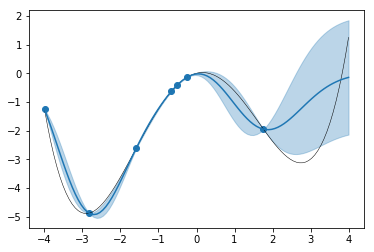

In [116]:
np.random.seed(2)
sample_x = sample_x.tolist()
sample_x += [np.random.rand()*8-4]
sample_x = np.array(sample_x)
sample_y = functionX(sample_x)
gpr.fit(sample_x.reshape(-1,1), sample_y)

plt.scatter(sample_x, sample_y)
mean, std = gpr.predict(x.reshape(-1,1), return_std=True)
plt.plot(x, functionX(x), color="black", linewidth=0.5)
plt.plot(x, mean, color="C0")
plt.fill_between(x, mean-std*2, mean+std*2, alpha=0.3, color="C0")

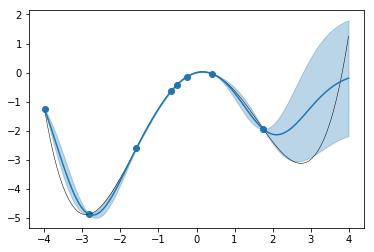

In [117]:
np.random.seed(3)
sample_x = sample_x.tolist()
sample_x += [np.random.rand()*8-4]
sample_x = np.array(sample_x)
sample_y = functionX(sample_x)
gpr.fit(sample_x.reshape(-1,1), sample_y)

plt.scatter(sample_x, sample_y)
mean, std = gpr.predict(x.reshape(-1,1), return_std=True)
plt.plot(x, functionX(x), color="black", linewidth=0.5)
plt.plot(x, mean, color="C0")
plt.fill_between(x, mean-std*2, mean+std*2, alpha=0.3, color="C0")

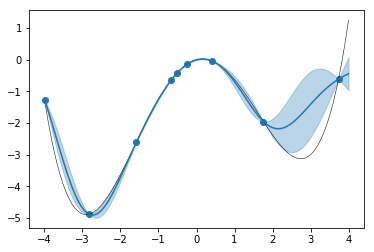

In [118]:
np.random.seed(4)
sample_x = sample_x.tolist()
sample_x += [np.random.rand()*8-4]
sample_x = np.array(sample_x)
sample_y = functionX(sample_x)
gpr.fit(sample_x.reshape(-1,1), sample_y)

plt.scatter(sample_x, sample_y)
mean, std = gpr.predict(x.reshape(-1,1), return_std=True)
plt.plot(x, functionX(x), color="black", linewidth=0.5)
plt.plot(x, mean, color="C0")
plt.fill_between(x, mean-std*2, mean+std*2, alpha=0.3, color="C0")

-2.6262626262626263

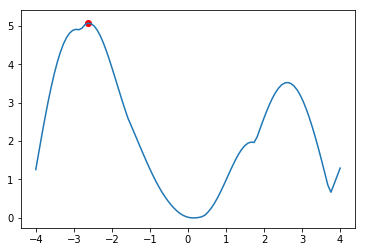

In [148]:
lcb = -mean+std*10*np.sqrt(np.log10(9)/9)
plt.plot(x, lcb)
next_x = x[np.argmax(lcb)]
plt.scatter([next_x], [lcb.max()])
#plt.ylim(0, 5.5)
next_x

-2.787878787878788

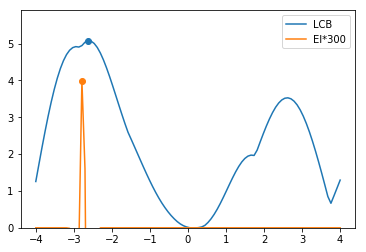

In [160]:
from scipy.stats import norm
improve = sample_y.min()-mean
gaussian = lambda x:1/np.sqrt(2*np.pi)*np.exp(-x**2/2)
ei = improve*norm.cdf(improve/std)-std*gaussian(improve/std)

plt.plot(x, lcb, label="LCB")
plt.scatter([next_x], [lcb.max()])
plt.plot(x, ei*300, label="EI*300")
plt.scatter([x[ei.argmax()]], [ei.max()*300])
plt.ylim(0)
plt.legend()
x[np.argmax(ei)]